In [1]:
import diplib as dip
from PIL import Image
import math
import imutils
import cv2
import numpy as np

In [63]:
img = cv2.imread('card.bmp', -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out_card.tiff', result)
cv2.imwrite('shadows_out_norm_card.tiff', result_norm)

True

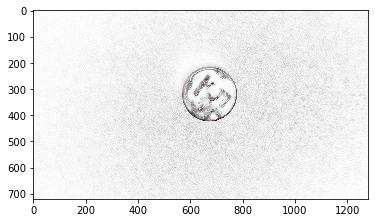

In [93]:
img = dip.ImageReadTIFF('shadows_out_norm_five.tiff')
img.SetPixelSize(dip.PixelSize(0.115 * dip.Units("mm")))
#img.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1.1, "um")))
img.Show()

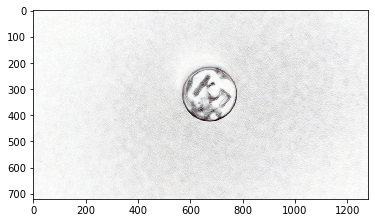

In [94]:
img_BF = dip.BilateralFilter(img, spatialSigmas=1, tonalSigma=0)
img_BF.Show()

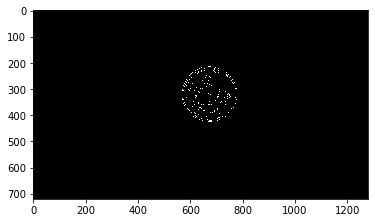

In [95]:
obj3 = dip.Canny(img_BF(0), upper=0.998)
obj3.Show()

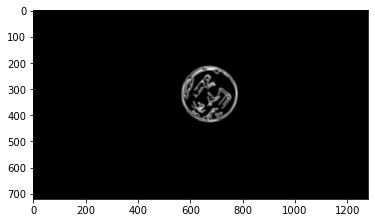

In [96]:
obj_BF = dip.BilateralFilter(obj3, spatialSigmas=3, tonalSigma=0)
obj_BF.Show()

Scalar image:
    data type BIN
    sizes {1280, 720} (2D)
    pixel size 0.115 mm x 0.115 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   0000023A27503010 (shared among 1 images)
    origin pointer: 0000023A27503010



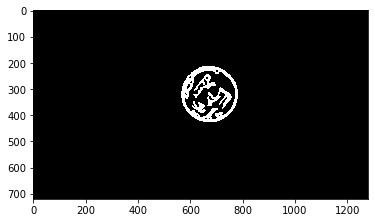

In [97]:
Threshold_obj = dip.Threshold(obj_BF)[0]
print(Threshold_obj)
Threshold_obj.Show()

Scalar image:
    data type UINT32
    sizes {1280, 720} (2D)
    pixel size 0.115 mm x 0.115 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   0000023A26229040 (shared among 1 images)
    origin pointer: 0000023A26229040



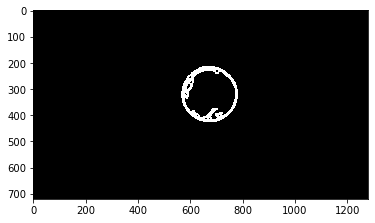

In [98]:
lab = dip.Label(Threshold_obj,minSize=5000)
print(lab)
lab.Show()

In [99]:
msr = dip.MeasurementTool.Measure(lab,img,['Size','Radius','Solidity'])
print(msr)

  |       Size |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      154.8 |      12.57 |      12.40 |      12.23 |    0.06813 |     0.3187 |      485.6 | 



In [176]:
msr["Radius"][1][0] * 2

25.14

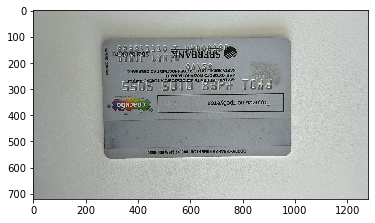

In [177]:
img = dip.ImageReadTIFF('card.tiff')
img.SetPixelSize(dip.PixelSize(0.115 * dip.Units("mm")))
#img.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1.1, "um")))
img.Show()

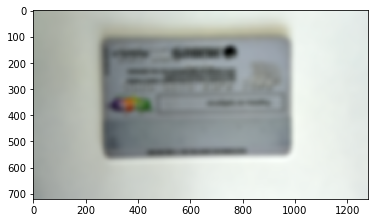

In [155]:
img_BF = dip.BilateralFilter(img, spatialSigmas=10, tonalSigma=0)
img_BF.Show()

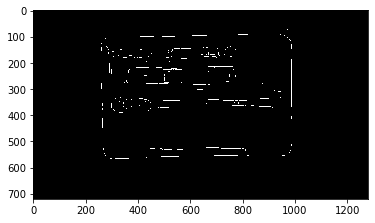

In [158]:
obj3 = dip.Canny(img_BF(0), upper=0.99)
obj3.Show()

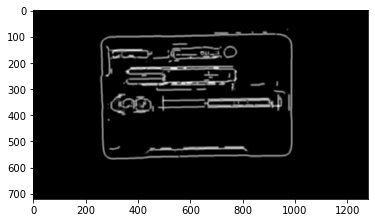

In [159]:
obj_BF = dip.BilateralFilter(obj3, spatialSigmas=3, tonalSigma=30)
obj_BF.Show()

Scalar image:
    data type BIN
    sizes {1280, 720} (2D)
    pixel size 0.115 mm x 0.115 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   0000023A28B8D210 (shared among 1 images)
    origin pointer: 0000023A28B8D210



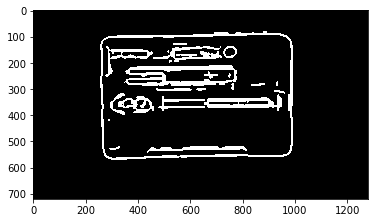

In [160]:
Threshold_obj = dip.Threshold(dip.Gauss(obj_BF))[0]
print(Threshold_obj)
Threshold_obj.Show()

Scalar image:
    data type UINT32
    sizes {1280, 720} (2D)
    pixel size 0.115 mm x 0.115 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   0000023A262D3040 (shared among 1 images)
    origin pointer: 0000023A262D3040



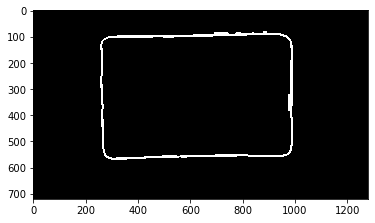

In [168]:
lab = dip.Label(Threshold_obj,minSize=20000)
print(lab)
lab.Show()

In [174]:
msr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','CartesianBox','Solidity'])
print(msr)

  |       Size |  Perimeter |            CartesianBox |   Solidity | ConvexArea | 
- | ---------- | ---------- | ----------------------- | ---------- | ---------- | 
  |            |            |       dim0 |       dim1 |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      280.6 |      268.5 |      84.76 |      56.47 |    0.06082 |      4614. | 



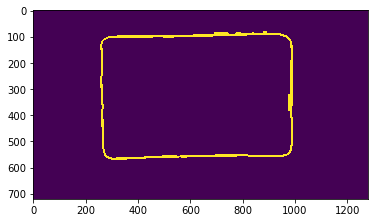

In [179]:
c = dip.ObjectToMeasurement(lab, msr['Solidity']) 
c.Show(colormap='viridis')